<a href="https://colab.research.google.com/github/juliakatsoulis/Portfolio/blob/main/lasso_ridge_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING PACKAGES AND DATA UPLOAD**

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

#CONNECTING TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

#Data upload
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BIG PROJECT FOLDER/cbb_three_year_data_good_variables.csv')
data['win_percentage'] = data['W'] / data['G']

#Define features and target
X = data.drop(columns=['win_percentage', 'W', 'WAB', 'Team'])
y = data['win_percentage']

#Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['CONF'], prefix=['CONF'])

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Mounted at /content/drive


**IS OUR DATA BALANCED?**

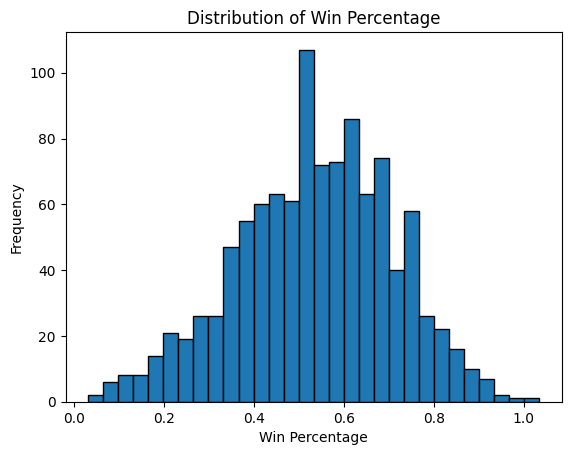

count    1074.000000
mean        0.534001
std         0.173651
min         0.031250
25%         0.424242
50%         0.535714
75%         0.656250
max         1.034483
Name: win_percentage, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

plt.hist(y, bins=30, edgecolor='black')
plt.title("Distribution of Win Percentage")
plt.xlabel("Win Percentage")
plt.ylabel("Frequency")
plt.show()

print(y.describe())

**BUILDING MODELS AND TOP PREDICTORS**

In [ ]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Lasso (L1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)

#Ridge (L2)
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_coefs = pd.Series(ridge.coef_, index=X.columns)

print("Lasso Selected Features:")
print(lasso_coefs[lasso_coefs != 0].sort_values(key=abs, ascending=False))

print("Ridge Feature Importances (Top):")
print(ridge_coefs.sort_values(key=abs, ascending=False).head(10))

Lasso Selected Features:
EFG_O         0.069812
EFG_D        -0.067743
TORD          0.037354
TOR          -0.035073
ORB           0.028776
DRB          -0.023014
FTR           0.011885
SOS_Rating   -0.004025
3P_O          0.002684
dtype: float64
Ridge Feature Importances (Top):
SOS_Rating   -0.108479
ADJOE         0.101500
ADJDE        -0.093809
EFG_D        -0.060688
TORD          0.028371
TOR          -0.027324
ORB           0.021089
EFG_O         0.019046
FTR           0.017714
FTRD         -0.015972
dtype: float64


**EVALUATION**

Lasso Performance:
  MSE: 0.00554866761787672
  RMSE: 0.07448937922869756
  MAE: 0.059172123944950625
  R²: 0.8042585989578049
Ridge Performance:
  MSE: 0.004480413864422193
  RMSE: 0.06693589369256372
  MAE: 0.05114517929660296
  R²: 0.8419435894402207


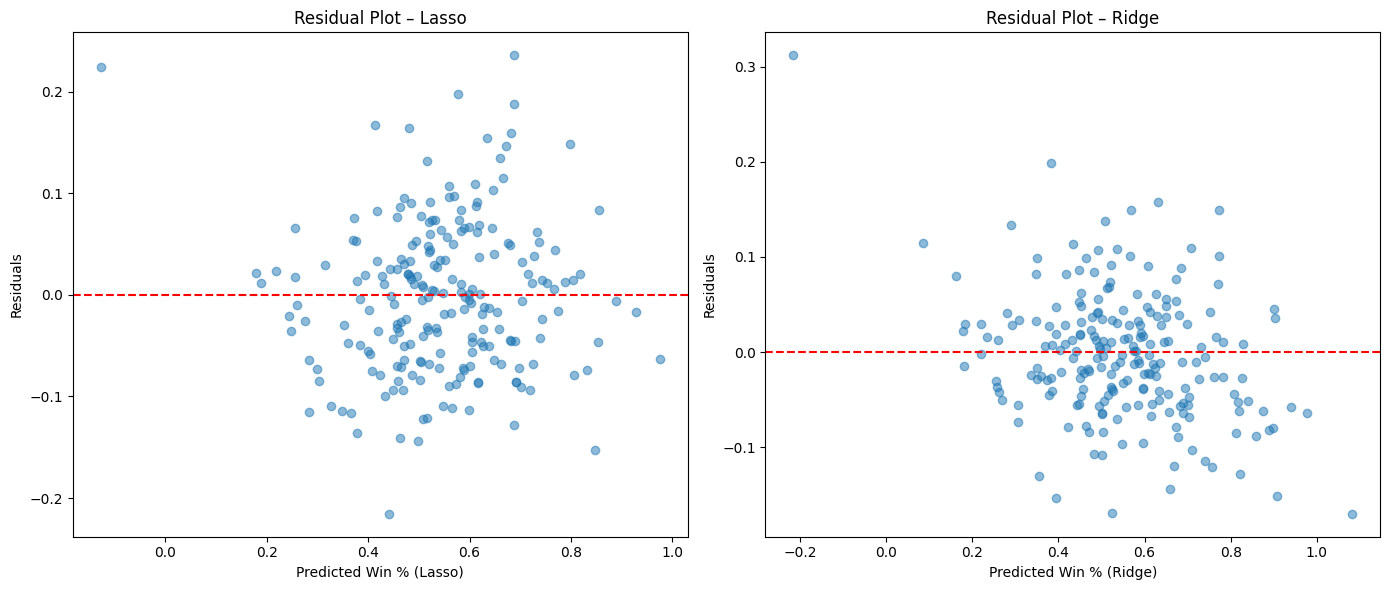

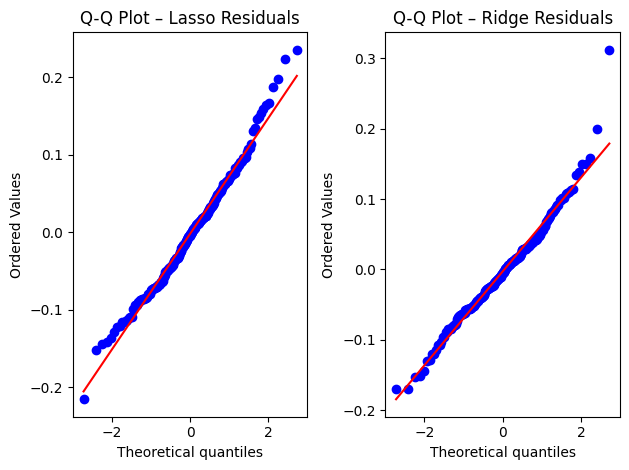

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats as stats


#Metrics
print("Lasso Performance:")
print("  MSE:", mean_squared_error(y_test, lasso_preds))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("  MAE:", mean_absolute_error(y_test, lasso_preds))
print("  R²:", r2_score(y_test, lasso_preds))

print("Ridge Performance:")
print("  MSE:", mean_squared_error(y_test, ridge_preds))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("  MAE:", mean_absolute_error(y_test, ridge_preds))
print("  R²:", r2_score(y_test, ridge_preds))

#Residuals
lasso_residuals = y_test - lasso_preds
ridge_residuals = y_test - ridge_preds

#Plot Residuals
plt.figure(figsize=(14, 6))

#Lasso Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(lasso_preds, lasso_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Win % (Lasso)")
plt.ylabel("Residuals")
plt.title("Residual Plot – Lasso")

#Ridge Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(ridge_preds, ridge_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Win % (Ridge)")
plt.ylabel("Residuals")
plt.title("Residual Plot – Ridge")

plt.tight_layout()
plt.show()

#Lasso Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(lasso_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot – Lasso Residuals")

#Ridge Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(ridge_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot – Ridge Residuals")


plt.tight_layout()
plt.show()

**WHAT IF WE DID LASSOCV AND RIDGECV?**

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV

#using CV
lasso2 = LassoCV(cv=5).fit(X_train, y_train)
ridge2 = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5).fit(X_train, y_train)


#Top predictors
lasso2_coefs = pd.Series(lasso2.coef_, index=X.columns)
ridge2_coefs = pd.Series(ridge2.coef_, index=X.columns)


print("LassoCV Selected Features (Non-zero Coefficients):")
print(lasso2_coefs[lasso2_coefs != 0].sort_values(key=abs, ascending=False).head(10))

print("RidgeCV Feature Importances (Top 10 by Magnitude):")
print(ridge2_coefs.sort_values(key=abs, ascending=False).head(10))

LassoCV Selected Features (Non-zero Coefficients):
SOS_Rating   -0.112478
ADJOE         0.096929
ADJDE        -0.088927
EFG_D        -0.041195
EFG_O         0.032049
TORD          0.029883
TOR          -0.028102
ORB           0.022164
FTR           0.017620
DRB          -0.016368
dtype: float64
RidgeCV Feature Importances (Top 10 by Magnitude):
SOS_Rating   -0.101371
ADJOE         0.096094
ADJDE        -0.089794
EFG_D        -0.044701
TORD          0.029174
TOR          -0.028416
ORB           0.022210
EFG_O         0.020028
FTR           0.017986
DRB          -0.016167
dtype: float64


**EVALUTATION**

LassoCV (α = 0.0003)
  MSE:  0.0044
  RMSE: 0.0664
  MAE:  0.0508
  R²:   0.8446

RidgeCV (α = 1.0000)
  MSE:  0.0045
  RMSE: 0.0670
  MAE:  0.0511
  R²:   0.8415


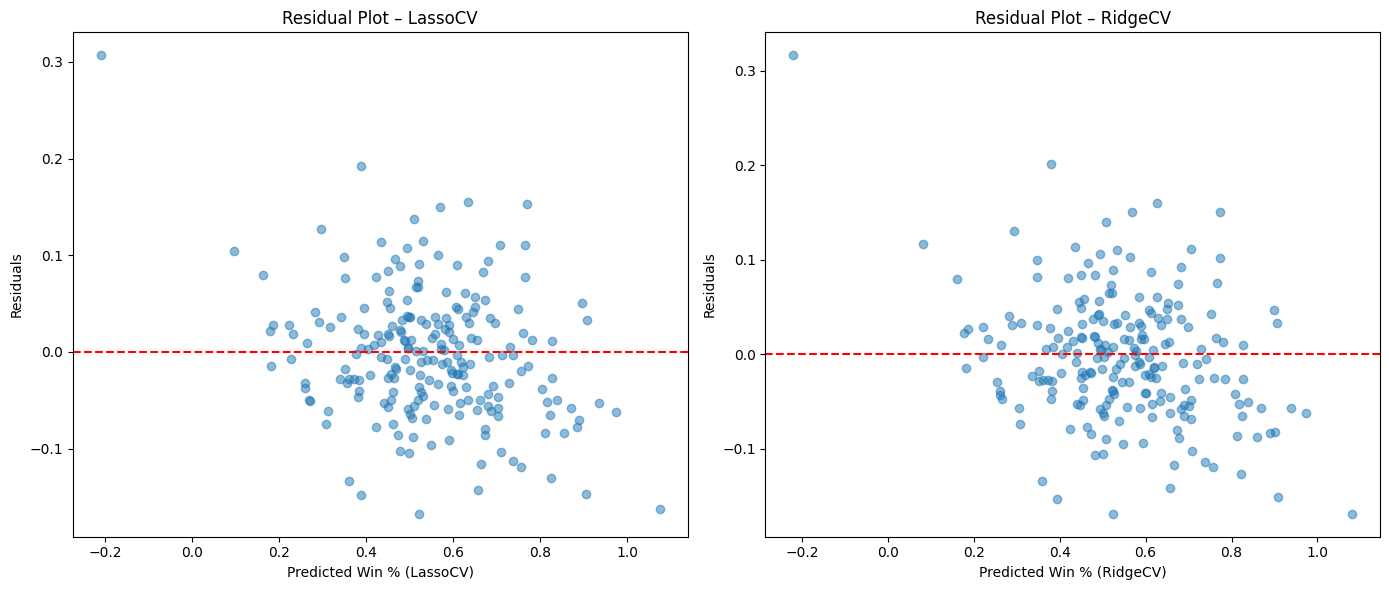

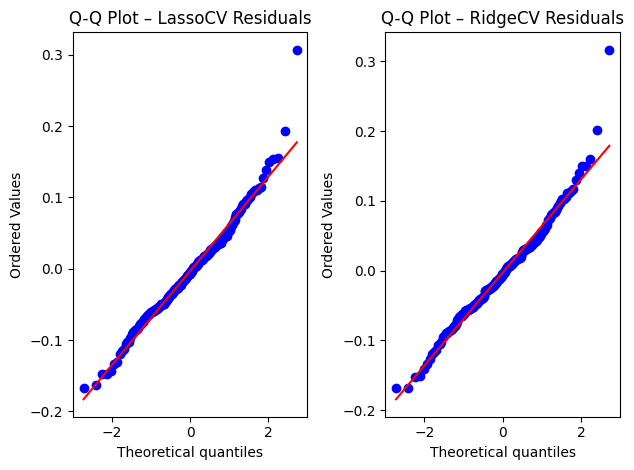

In [ ]:
#Predictions
lasso2_preds = lasso2.predict(X_test)
ridge2_preds = ridge2.predict(X_test)

#LassoCV metrics
lasso2_mse = mean_squared_error(y_test, lasso2_preds)
lasso2_rmse = np.sqrt(lasso2_mse)
lasso2_mae = mean_absolute_error(y_test, lasso2_preds)
lasso2_r2 = r2_score(y_test, lasso2_preds)

#RidgeCV metrics
ridge2_mse = mean_squared_error(y_test, ridge2_preds)
ridge2_rmse = np.sqrt(ridge2_mse)
ridge2_mae = mean_absolute_error(y_test, ridge2_preds)
ridge2_r2 = r2_score(y_test, ridge2_preds)

print("LassoCV (α = {:.4f})".format(lasso2.alpha_))
print(f"  MSE:  {lasso2_mse:.4f}")
print(f"  RMSE: {lasso2_rmse:.4f}")
print(f"  MAE:  {lasso2_mae:.4f}")
print(f"  R²:   {lasso2_r2:.4f}\n")

print("RidgeCV (α = {:.4f})".format(ridge2.alpha_))
print(f"  MSE:  {ridge2_mse:.4f}")
print(f"  RMSE: {ridge2_rmse:.4f}")
print(f"  MAE:  {ridge2_mae:.4f}")
print(f"  R²:   {ridge2_r2:.4f}")

#Residuals
lasso2_residuals = y_test - lasso2_preds
ridge2_residuals = y_test - ridge2_preds

#Plot Residuals
plt.figure(figsize=(14, 6))

#LassoCV Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(lasso2_preds, lasso2_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Win % (LassoCV)")
plt.ylabel("Residuals")
plt.title("Residual Plot – LassoCV")

#RidgeCV Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(ridge2_preds, ridge2_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Win % (RidgeCV)")
plt.ylabel("Residuals")
plt.title("Residual Plot – RidgeCV")

plt.tight_layout()
plt.show()


#LassoCV Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(lasso2_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot – LassoCV Residuals")

#RidgeCV Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(ridge2_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot – RidgeCV Residuals")


plt.tight_layout()
plt.show()

**RIDGE WITH CLOSED FORM SOLUTION TO DOUBLE CHECK**

In [ ]:
#Ridge with Closed Form Solution
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

#Closed-form Ridge with intercept
lambda_val = 1.0
lambda_I = lambda_val * np.eye(X_train_bias.shape[1])
lambda_I[0, 0] = 0

#Solve for coeff
ridge_manual_beta = np.linalg.inv(X_train_bias.T @ X_train_bias + lambda_I) @ X_train_bias.T @ y_train

#predict
ridge_manual_preds = X_test_bias @ ridge_manual_beta

#store
ridge_manual_coefs = pd.Series(ridge_manual_beta[1:], index=X.columns)

#TopPredictors
print("Ridge (Manual Closed-Form) Top 10 Features:")
print(ridge_manual_coefs.sort_values(key=abs, ascending=False).head(10))


Ridge (Manual Closed-Form) Top 10 Features:
SOS_Rating   -0.101371
ADJOE         0.096094
ADJDE        -0.089794
EFG_D        -0.044701
TORD          0.029174
TOR          -0.028416
ORB           0.022210
EFG_O         0.020028
FTR           0.017986
DRB          -0.016167
dtype: float64


Metrics for Closed-Form Ridge:
  MSE:  0.0045
  RMSE: 0.0670
  MAE:  0.0511
  R-squared:   0.8415


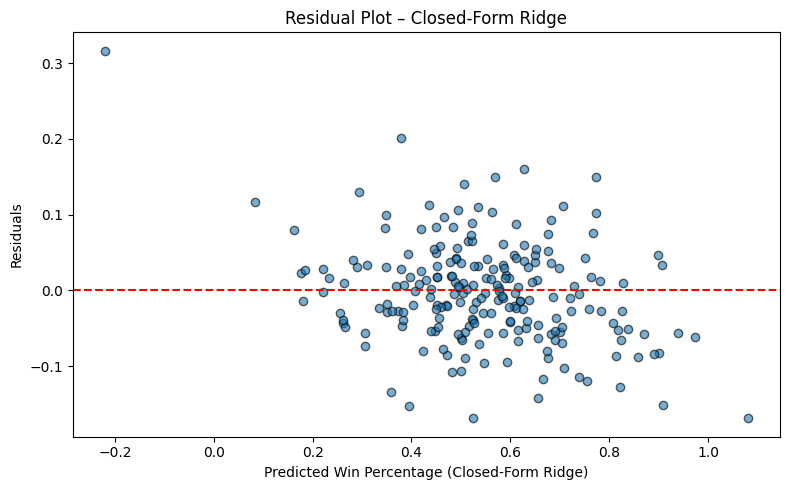

Text(0.5, 1.0, 'Q-Q Plot – RidgeCV Residuals')

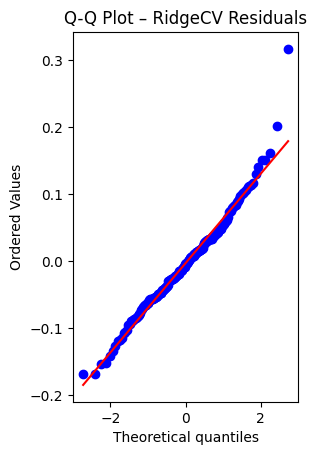

In [ ]:
#Evaluation
print("Metrics for Closed-Form Ridge:")
print(f"  MSE:  {mean_squared_error(y_test, ridge_manual_preds):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, ridge_manual_preds)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_test, ridge_manual_preds):.4f}")
print(f"  R-squared:   {r2_score(y_test, ridge_manual_preds):.4f}")



#Residuals
ridgeCF_residuals = y_test - ridge_manual_preds

#Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(ridge_manual_preds, ridgeCF_residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Win Percentage (Closed-Form Ridge)")
plt.ylabel("Residuals")
plt.title("Residual Plot – Closed-Form Ridge")

plt.tight_layout()
plt.show()

#RidgeCF Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(ridgeCF_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot – RidgeCV Residuals")